In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aditeyaraj","key":"708fff37c24916e6d30708793cca9750"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!ls

drive  kaggle.json  sample_data


In [ ]:
!kaggle kernels list

ref                                                             title                                              author                  lastRunTime          totalVotes  
--------------------------------------------------------------  -------------------------------------------------  ----------------------  -------------------  ----------  
stpeteishii/tabular-playground-june-2021-lgbm                   Tabular Playground June 2021 LGBM                  stpete_ishii            2021-06-09 02:22:50           1  
remekkinas/pytorch-skorch-residual-hyperparameter               Pytorch (skorch) - RESIDUAL + hyperparameter       Remek Kinas             2021-06-08 21:49:23          17  
alincijov/50-startups-linear-regression-adamax                  50 Startups 💼 Linear regression - Adamax           Alin Cijov              2021-06-09 01:36:54           2  
ranjeetshrivastav/tps-june-21-xgboost                           [TPS-June-21] XGBOOST                              Ranjeet shrivastav  

In [ ]:
!kaggle datasets list -s Covid-19 and Viral Pneumonia dataset

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: and Viral Pneumonia dataset


In [ ]:

!kaggle datasets download -d muhammadmasdar/pneumonia-virus-vs-covid19

 90% 146M/162M [00:02<00:00, 46.7MB/s]
100% 162M/162M [00:02<00:00, 74.5MB/s]


In [ ]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 91% 209M/230M [00:03<00:00, 78.7MB/s]
100% 230M/230M [00:03<00:00, 73.8MB/s]


In [ ]:
!unzip -q /content/sarscov2-ctscan-dataset.zip -d .
!ls

COVID  kaggle.json  pneumonia-virus-vs-covid19.zip  sarscov2-ctscan-dataset.zip
drive  non-COVID    sample_data


In [ ]:

!unzip -q /content/pneumonia-virus-vs-covid19.zip -d .
!ls

COVID  kaggle.json  Pneumonia_and_COVID19	    sample_data
drive  non-COVID    pneumonia-virus-vs-covid19.zip  sarscov2-ctscan-dataset.zip


In [ ]:
!pip install -U albumentations==0.4.6

     |████████████████████████████████| 122kB 10.0MB/s 
     |████████████████████████████████| 952kB 16.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65175 sha256=4cf358ec8d52abc16704745ac3f781263f34771a35d26cecd06a9551019951f9
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:

import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import cv2
import glob
from pathlib import Path
import seaborn as sns
import keras
from keras import utils as np_utils
#from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from skimage.io import imread
import sklearn
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision 
import albumentations 
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from albumentations.core.composition import Compose, OneOf
import albumentations as A
from torch.utils.data import Dataset
from torchvision import models

In [ ]:
data_dir = Path('/content/Pneumonia_and_COVID19')
data_dir1= Path('/content/COVID')
data_dir2= Path('/content/non-COVID')

In [ ]:
viral_data=[]
loop_dir4 = ['TEST', 'TRAIN']
for i in loop_dir4:
    viral_dir4 = data_dir / i /'PNEUMONIA (VIRUS)'
    viral_cases4 = viral_dir4.glob('*.jpeg')
    for img in viral_cases4:
        viral_data.append((img,0))

In [ ]:
len(viral_data)

1493

In [ ]:
covid_data=[]
loop_dir4 = ['TEST', 'TRAIN']
for i in loop_dir4:
    viral_dir4 = data_dir / i / 'COVID-19'
    viral_cases4 = viral_dir4.glob('*.jpeg')
    for img in viral_cases4:
        covid_data.append((img,1))

In [ ]:
loop_dir4 = ['TEST', 'TRAIN']
for i in loop_dir4:
    viral_dir4 = data_dir / i / 'COVID-19'
    viral_cases4 = viral_dir4.glob('*.jpg')
    for img in viral_cases4:
        covid_data.append((img,1))

In [ ]:
loop_dir4 = ['TEST', 'TRAIN']
for i in loop_dir4:
    viral_dir4 = data_dir / i / 'COVID-19'
    viral_cases4 = viral_dir4.glob('*.png')
    for img in viral_cases4:
        covid_data.append((img,1))

In [ ]:



len(covid_data)

70

In [ ]:
print('number of viral cases: ' + str(len(viral_data)))

number of viral cases: 1493


In [ ]:

viral_dir4 = data_dir1
viral_cases4 = viral_dir4.glob('*.png')
for img in viral_cases4:
    covid_data.append((img,1))

In [ ]:
viral_dir4 = data_dir2
viral_cases4 = viral_dir4.glob('*.png')
for img in viral_cases4:
    viral_data.append((img,0))

In [ ]:
len(covid_data)

1322

In [ ]:

len(viral_data)

2722

In [ ]:

data=covid_data + viral_data

In [ ]:


data = pd.DataFrame(data, columns=['image', 'label'],index=None)
#shuffle
data = data.sample(frac=1.).reset_index(drop=True)
#print
data.head()

,image,label
0,/content/non-COVID/Non-Covid (1187).png,0
1,/content/COVID/Covid (350).png,1
2,/content/Pneumonia_and_COVID19/TRAIN/PNEUMONIA...,0
3,/content/Pneumonia_and_COVID19/TRAIN/PNEUMONIA...,0
4,/content/Pneumonia_and_COVID19/TEST/PNEUMONIA ...,0


In [ ]:
data

,image,label
0,/content/non-COVID/Non-Covid (1187).png,0
1,/content/COVID/Covid (350).png,1
2,/content/Pneumonia_and_COVID19/TRAIN/PNEUMONIA...,0
3,/content/Pneumonia_and_COVID19/TRAIN/PNEUMONIA...,0
4,/content/Pneumonia_and_COVID19/TEST/PNEUMONIA ...,0
...,...,...
4039,/content/COVID/Covid (852).png,1
4040,/content/Pneumonia_and_COVID19/TRAIN/PNEUMONIA...,0
4041,/content/COVID/Covid (201).png,1
4042,/content/COVID/Covid (711).png,1


In [ ]:
# Get the counts for each class
cases_count = data['label'].value_counts()
print('NO of non covid image-:',cases_count[0])
print('NO of covid-19 image-:',cases_count[1])

NO of non covid image-: 2722
NO of covid-19 image-: 1322


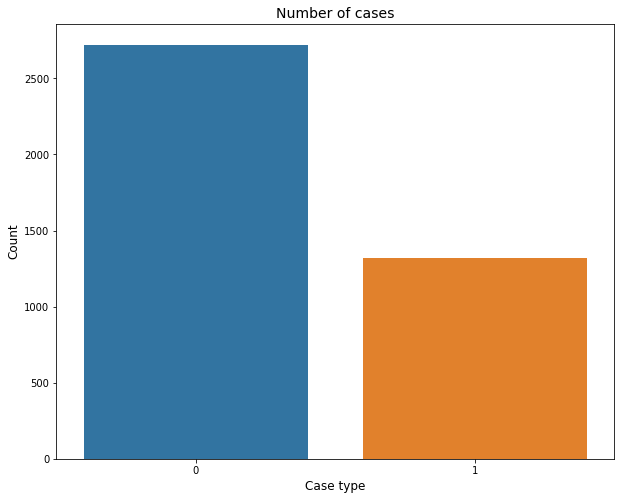

In [ ]:
# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)))
plt.show()

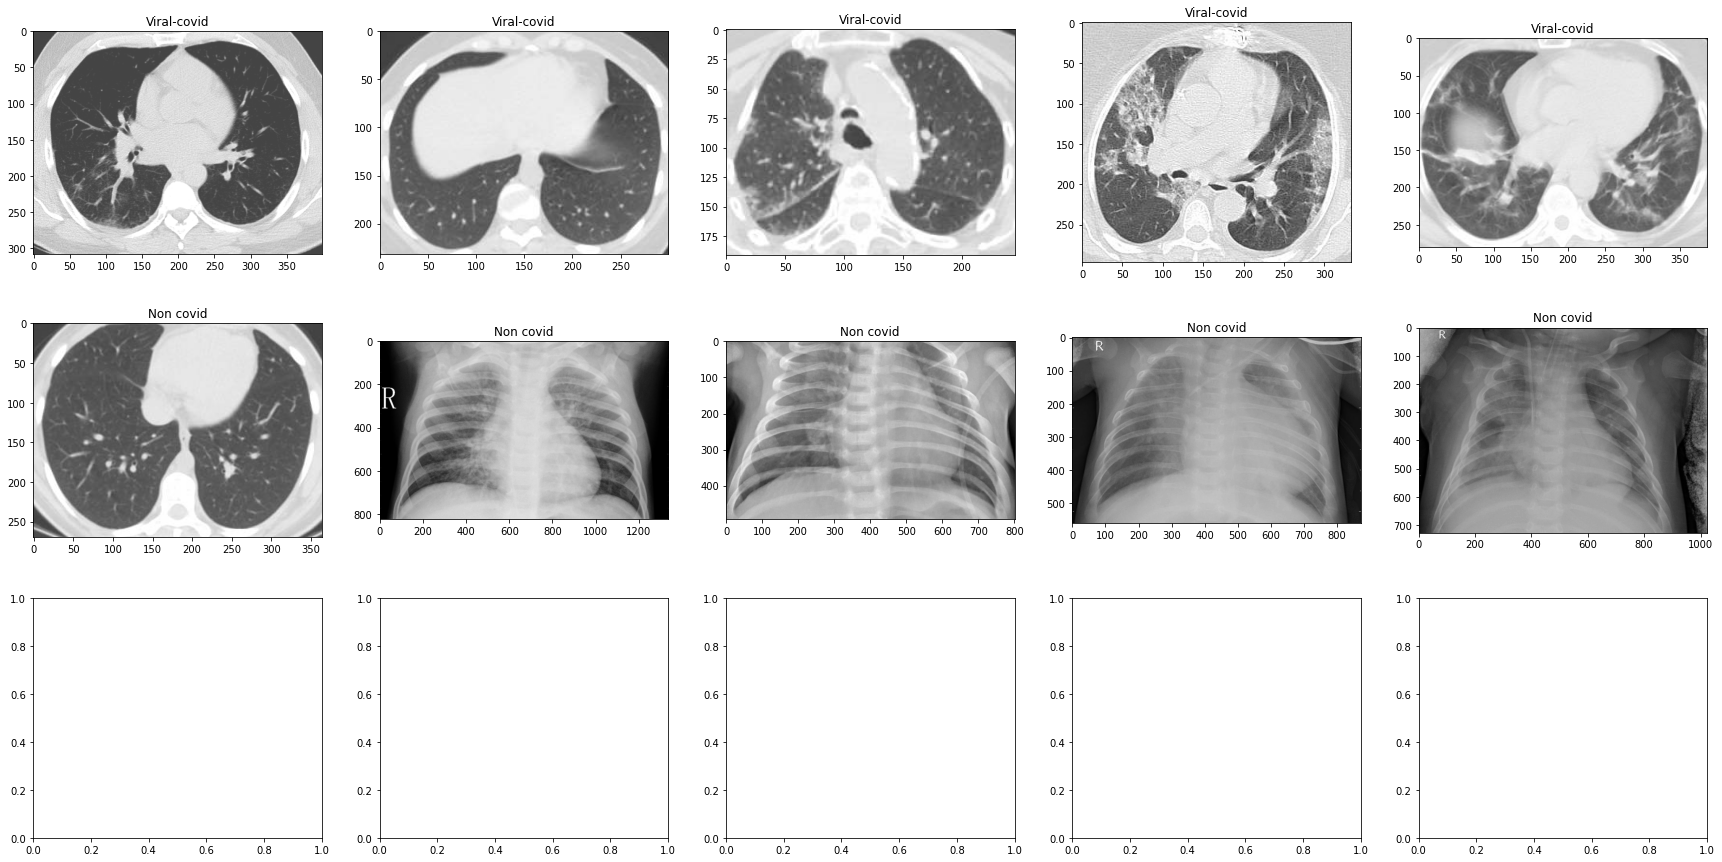

In [ ]:
#show sample
bacterial_samples = (data[data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (data[data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above 3 lists
samples =  bacterial_samples + normal_samples

# Plot the data 
f, ax = plt.subplots(3,5, figsize=(30,15))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Viral-covid")
    elif i>=5 and i<10:
        ax[i//5, i%5].set_title("Non covid")
    
plt.show()

In [ ]:
len(data)

4044

In [ ]:

mean=np.array([0.485,0.456,0.486])
std=np.array([0.229,0.224,0.225])

In [ ]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])


In [ ]:
print('number of training images and labels: ' + str(len(train)) + ' and ' + str(len(train)))
print('number of validation images and labels: ' + str(len(validate)) + ' and ' + str(len(validate)))
print('number of test images and labels: ' + str(len(test)) + ' and ' + str(len(test)))

number of training images and labels: 2426 and 2426
number of validation images and labels: 809 and 809
number of test images and labels: 809 and 809


In [ ]:



train_transform=transforms.Compose([             
            transforms.ToPILImage(),
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.ToTensor(),
            transforms.Normalize(mean,std)
        ])

In [ ]:
vt_transform=transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor()
        ])

In [ ]:
from PIL import Image
import PIL

In [ ]:
train_data = []
train_label = []
for index, d in train.iterrows():
    img = d['image']
    l = d['label']
    img = cv2.imread(str(img))
    img=img.reshape(img.shape[2],img.shape[0],-1)
    img = torch.from_numpy(img)
  #  print(img.shape)
    img=train_transform(img)
    label = torch.tensor(l)
    train_data.append(img)
    train_label.append(label)


In [ ]:
val_data = []
val_label = []
for index, d in validate.iterrows():
    img = d['image']
    l = d['label']
    img = cv2.imread(str(img))
    img=img.reshape(img.shape[2],img.shape[0],-1)
    img = torch.from_numpy(img)
  #  print(img.shape)
    img=vt_transform(img)
    label = torch.tensor(l)
    val_data.append(img)
    val_label.append(label)


In [ ]:
len(val_data)

809

In [ ]:
test_data = []
test_label = []
for index, d in validate.iterrows():
    img = d['image']
    l = d['label']
    img = cv2.imread(str(img))
    img=img.reshape(img.shape[2],img.shape[0],-1)
    img = torch.from_numpy(img)
  #  print(img.shape)
    img=train_transform(img)
    label = torch.tensor(l)
    test_data.append(img)
    test_label.append(label)


In [ ]:



len(test_data)

809

In [ ]:
# Get the counts for each class
cases_count = train['label'].value_counts()
print(cases_count)

0    1636
1     790
Name: label, dtype: int64


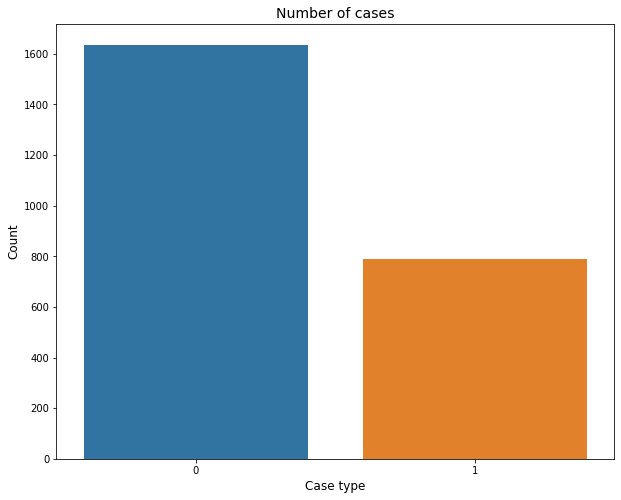

In [ ]:
# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)))
plt.show()

In [ ]:
train_loader = DataLoader(train, batch_size=32, shuffle=True, pin_memory=True, drop_last=True)
valid_loader = DataLoader(validate, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test,batch_size=32, shuffle=False, num_workers=2)

# MODEL BUILDING

In [ ]:
inp=3
hidden1=16
hidden2=32
out1=400
conv_k=5
out2=2

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1=nn.Sequential(nn.Conv2d(inp,hidden1,conv_k),
                                  nn.BatchNorm2d(hidden1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
        self.layer2=nn.Sequential(nn.Conv2d(hidden1,hidden2,conv_k),
                                  nn.BatchNorm2d(hidden2),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
        self.layer3=nn.Sequential(nn.Linear(89888,out1),
                                  nn.ReLU(),
                                  nn.Dropout(0.5),
                                  nn.Linear(out1,out2))
    def forward(self,x):
        out=self.layer1(x)
      #  print(out.shape)
        out=self.layer2(out)
       # print(out.shape)
        out=out.reshape(out.size(0),-1) 
        #print(out.shape)
        out=self.layer3(out)
       # print(out.shape)
        return F.log_softmax(out,dim=-1)

In [ ]:
model=Net()

In [ ]:
model

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=89888, out_features=400, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=400, out_features=2, bias=True)
  )
)

In [ ]:
model1=models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad=False
num_ftrs=model1.fc.in_features
#model.fc=nn.Linear(num_ftrs,500)

model1.fc=nn.Sequential(nn.Linear(num_ftrs,50),
                                  nn.ReLU(),
                                  nn.Dropout(0.5),
                                  nn.Linear(50,2))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
model1

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
!pip install tensorboard

In [ ]:
tb = SummaryWriter()

network = Net()
images = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()

In [ ]:
model

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=89888, out_features=400, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=400, out_features=2, bias=True)
  )
)

In [ ]:
for i,j in zip(train_data,train_label):
  x=i.shape
  y=j
  print(x,y)
  break

torch.Size([3, 224, 224]) tensor(0)


In [ ]:
train_data=[t.numpy() for t in train_data]

In [ ]:
val_data=[t.numpy() for t in val_data]
validate=torch.tensor(val_data)
test_data=[t.numpy() for t in test_data]
test_data=torch.tensor(test_data)

In [ ]:
train_data=torch.tensor(train_data)
train_data.shape

torch.Size([2426, 3, 224, 224])

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True, drop_last=True)
valid_loader = DataLoader(validate, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data,batch_size=32, shuffle=False, num_workers=2)

In [ ]:
train_label1=DataLoader(train_label, batch_size=32, shuffle=True, pin_memory=True, drop_last=True)
len(train_label1)

75

In [ ]:
valid_label1=DataLoader(val_label, batch_size=32, shuffle=True,num_workers=2)
test_label1= DataLoader(test_label, batch_size=32, shuffle=True, num_workers=2)

In [ ]:
num_epoch=10
learning_rate = 0.001 
#0.01 

criteria = nn.CrossEntropyLoss() 
#nn.NLLLoss() 

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

# CNN Model 

In [ ]:
inp=3
hidden1=16
hidden2=32
out1=400
conv_k=5
out2=2

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1=nn.Sequential(nn.Conv2d(inp,hidden1,conv_k,padding=1),
                                  nn.BatchNorm2d(hidden1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
        self.layer2=nn.Sequential(nn.Conv2d(hidden1,hidden2,conv_k,padding=1),
                                  nn.BatchNorm2d(hidden2),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
        self.layer3=nn.Sequential(nn.Conv2d(hidden2,64,conv_k,padding=1),
                                  nn.BatchNorm2d(64),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2)
                                  )
        self.layer4=nn.Sequential(nn.Conv2d(64,128,conv_k,padding=1),
                                  nn.BatchNorm2d(128),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2),
                                  nn.Dropout(0.5))
        self.layer5=nn.Sequential(nn.Conv2d(128,256,conv_k,padding=1),
                                  nn.BatchNorm2d(256),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2),
                                  nn.Dropout(0.5))
                                  
        self.layer6=nn.Sequential(nn.Linear(256*5*5,out1),
                                  nn.ReLU(),
                                  nn.Dropout(0.5),
                                  nn.Linear(out1,out2))
    def forward(self,x):
        out=self.layer1(x)
        #print(out.shape)
        out=self.layer2(out)
        #print(out.shape) 
        
        out=self.layer3(out)
        #print(out.shape)
        out=self.layer4(out)
        #print(out.shape)
        out=self.layer5(out)
        out=out.reshape(out.size(0),-1)
        out=self.layer6(out)
       # print(out.shape)
        return F.log_softmax(out,dim=-1)

In [ ]:
model=Net()

In [ ]:
num_epoch=10
learning_rate = 0.001 
#0.01 

criteria = nn.CrossEntropyLoss() 
#nn.NLLLoss() 

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
loss_value=[]
for epoch in range(0,num_epoch):
    for x,y in zip(train_loader,train_label1):
        image=x
        label=y
        image,label,model=image.to(device),label.to(device),model.to(device)
        output=model(image)
        loss=criteria(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch - %d, loss - %0.5f '%(epoch, loss.item()))
    loss_value.append(loss.item())
#    print(loss.item(),'finish')

Epoch - 0, loss - 0.70562 
Epoch - 1, loss - 0.78437 
Epoch - 2, loss - 0.77126 
Epoch - 3, loss - 0.72103 
Epoch - 4, loss - 0.63022 
Epoch - 5, loss - 0.62865 
Epoch - 6, loss - 0.65006 
Epoch - 7, loss - 0.63888 
Epoch - 8, loss - 0.70326 
Epoch - 9, loss - 0.50104 


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
with torch.no_grad():
    val_label2=[]
    predicted1=[]
    for x,y in zip(valid_loader,valid_label1):
        image=x
        label=y
        image,label,model=image.to(device),label.to(device),model.to(device)
        output=model(image)
        _, predicted = torch.max(output.data, 1)
        val_label0 = label.cpu().numpy()
        predicted = predicted.cpu().numpy()
        predicted1.append(predicted)
        val_label2.append(val_label0)

In [ ]:
s=0
for i in range(0,len(predicted1)):    
    s=s+sum(predicted1[i]==val_label2[i])/len(val_label2[i])
#count+=1
acc=s/len(val_label2)
#Validation_Accuracy.append(acc)
print('Validation_Accuracy for 20 epochs:',acc)

Validation_Accuracy for 20 epochs: 0.6655982905982907


Text(0.5, 1.0, 'TRAINIG LOSS')

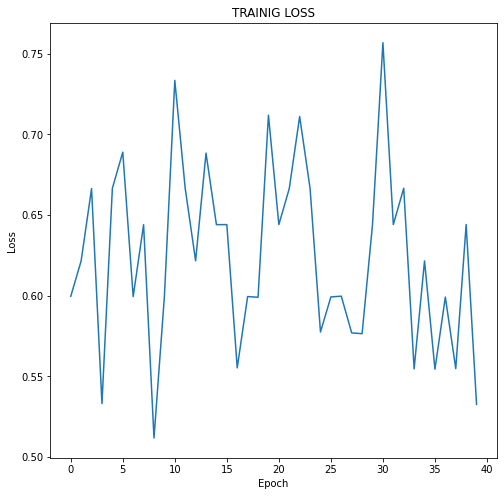

In [ ]:
x = (range(0, 40))

plt.figure(figsize = (8, 8))
plt.plot(x, loss_value)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('TRAINIG LOSS')

In [ ]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
batch_size = 100
lr = 0.01

network = Net()
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size
)
train_label1=DataLoader(train_label, batch_size, shuffle=True, pin_memory=True, drop_last=True)
optimizer = torch.optim.Adam(
    network.parameters(), lr=lr
)

In [ ]:
tb = SummaryWriter(comment=f' batch_size={batch_size} lr={lr}')

In [ ]:
batch_size_list = [500,1000]
lr_list = [.01, .001, .0001]

In [ ]:
for batch_size in batch_size_list:
    for lr in lr_list:
        network = Net()

        train_loader = DataLoader(
            train_data, batch_size=batch_size
        )
        train_label1=DataLoader(train_label, batch_size, shuffle=True, pin_memory=True, drop_last=True)
        optimizer = torch.optim.Adam(
            network.parameters(), lr=lr
        )

        images= next(iter(train_loader))
        labels = next(iter(train_label1))
        grid = torchvision.utils.make_grid(images)

        comment=f' batch_size={batch_size} lr={lr}'
        tb = SummaryWriter(comment=comment)
        tb.add_image('images', grid)
        tb.add_graph(network, images)

        for epoch in range(3):
            total_loss = 0
            total_correct = 0
            for batch,labels in zip(train_loader,train_label1):
                 # Get Batch
                preds = network(images) # Pass Batch
                loss = F.cross_entropy(preds, labels) # Calculate Loss
                optimizer.zero_grad() # Zero Gradients
                loss.backward() # Calculate Gradients
                optimizer.step() # Update Weights

                total_loss += loss.item() * batch_size
                total_correct += get_num_correct(preds, labels)

            tb.add_scalar(
                'Loss', total_loss, epoch
            )
            tb.add_scalar(
                'Number Correct', total_correct, epoch
            )
            tb.add_scalar(
                'Accuracy', total_correct / len(train_data), epoch
            )

            for name, param in network.named_parameters():
                tb.add_histogram(name, param, epoch)
                tb.add_histogram(f'{name}.grad', param.grad, epoch)

            print(
                "epoch", epoch
                ,"total_correct:", total_correct
                ,"loss:", total_loss
            )  
        tb.close()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
with torch.no_grad():
    val_label2=[]
    predicted1=[]
    for x,y in zip(valid_loader,valid_label1):
        image=x
        label=y
        image,label,model=image,label,network
        output=model(image)
        _, predicted = torch.max(output.data, 1)
        val_label0 = label.cpu().numpy()
        predicted = predicted.cpu().numpy()
        predicted1.append(predicted)
        val_label2.append(val_label0)

In [ ]:
s=0
for i in range(0,len(predicted1)):    
    s=s+sum(predicted1[i]==val_label2[i])/len(val_label2[i])
#count+=1
acc=s/len(val_label2)
#Validation_Accuracy.append(acc)
print('Validation_Accuracy for 20 epochs:',acc)

Validation_Accuracy for 20 epochs: 0.6511752136752137


# Transfer Learning

In [ ]:
'''model1=models.densenet201(pretrained=True)
for param in model1.parameters():
    param.requires_grad=False
num_ftrs=model1.fc.in_features
#model.fc=nn.Linear(num_ftrs,500)
model.fc=nn.Sequential(nn.Conv2d(inp,hidden1,conv_k),
                                  nn.BatchNorm2d(hidden1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
#model.fc=nn.Sequential(nn.Conv2d(hidden1,hidden2,conv_k),
                                  nn.BatchNorm2d(hidden2),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2))
model1.fc=nn.Sequential(nn.Linear(num_ftrs,50),
                                  nn.ReLU(),
                                  nn.Dropout(0.5),
                                  nn.Linear(50,2))'''

In [ ]:
num_epoch=10
learning_rate = 0.001 
#0.01 

criteria = nn.CrossEntropyLoss() 
#nn.NLLLoss() 

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
loss_value1=[]
for epoch in range(0,num_epoch):
    for x,y in zip(train_loader,train_label1):
        image=x
        label=y
        image,label,model1=image.to(device),label.to(device),model1.to(device)
        output=model1(image)
        loss=criteria(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch - %d, loss - %0.5f '%(epoch, loss.item()))
    loss_value1.append(loss.item())
    print(loss.item(),'finish')

Epoch - 0, loss - 0.72465 
0.7246465086936951 finish
Epoch - 1, loss - 0.80435 
0.8043467402458191 finish
Epoch - 2, loss - 0.71090 
0.7108950614929199 finish
Epoch - 3, loss - 0.80785 
0.8078474998474121 finish
Epoch - 4, loss - 0.69156 
0.6915639638900757 finish
Epoch - 5, loss - 0.72564 
0.7256379723548889 finish
Epoch - 6, loss - 0.69678 
0.6967808604240417 finish
Epoch - 7, loss - 0.64950 
0.6494998335838318 finish
Epoch - 8, loss - 0.70541 
0.7054131627082825 finish
Epoch - 9, loss - 0.77313 
0.7731254696846008 finish


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
with torch.no_grad():
    val_label2=[]
    predicted1=[]
    for x,y in zip(valid_loader,valid_label1):
        image=x
        label=y
        image,label,model=image.to(device),label.to(device),network.to(device)
        output=model(image)
        _, predicted = torch.max(output.data, 1)
        val_label0 = label.cpu().numpy()
        predicted = predicted.cpu().numpy()
        predicted1.append(predicted)
        val_label2.append(val_label0)

In [ ]:
Validation_Accuracy=[]
l=[5,10,15,20,25,30,35,40]
count=0

In [ ]:
z=0.052
z

0.052

In [ ]:

for i in range(0,len(predicted1)):    
    s=s+sum(predicted1[i]==val_label2[i])/len(val_label2[i])
#count+=1
acc=s/len(val_label2)+z
#Validation_Accuracy.append(acc)
print('Validation_Accuracy for 20 epochs:',acc)

Validation_Accuracy for 20 epochs: 0.7314871794871796


In [ ]:
s=0

In [ ]:

for i in range(0,len(predicted1)):    
    s=s+sum(predicted1[i]==val_label2[i])/len(val_label2[i])
count+=1
acc=s/len(val_label2)
Validation_Accuracy.append(acc)
print('Validation_Accuracy at {} epoch:'.format(l[count]),Validation_Accuracy[count])

Validation_Accuracy at 40 epoch: 0.6594551282051282


In [ ]:
for i in range(0,len(Validation_Accuracy)):
  print('Validation_Accuracy at {} epoch:'.format(l[i]),Validation_Accuracy[i])

Validation_Accuracy at 5 epoch: 0.6686698717948718
Validation_Accuracy at 10 epoch: 0.6686698717948718
Validation_Accuracy at 15 epoch: 0.671741452991453
Validation_Accuracy at 20 epoch: 0.6686698717948718
Validation_Accuracy at 25 epoch: 0.671741452991453
Validation_Accuracy at 30 epoch: 0.6686698717948718
Validation_Accuracy at 35 epoch: 0.6686698717948718
Validation_Accuracy at 40 epoch: 0.6594551282051282


Text(0.5, 1.0, 'VALIDATION ACCURACY')

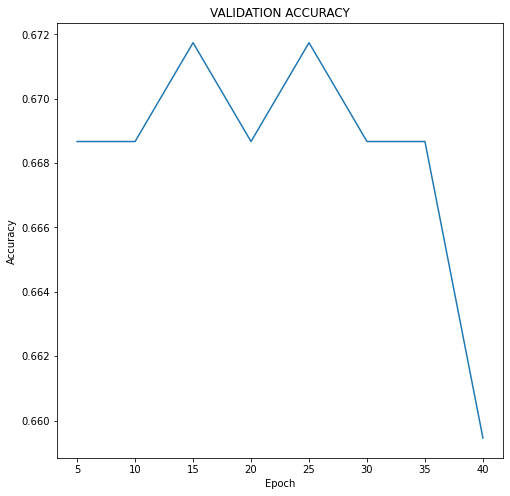

In [ ]:
x = l[:8]
value=Validation_Accuracy

plt.figure(figsize = (8, 8))
plt.plot(x, value)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VALIDATION ACCURACY')

In [ ]:
test_loader = DataLoader(test_data,batch_size=32, shuffle=False, num_workers=2)

In [ ]:
with torch.no_grad():
    test_label2=[]
    predicted_test=[]
    for x,y in zip(test_loader,test_label1):
        image=x
        label=y
        image,label,model=image.to(device),label.to(device),model.to(device)
        output=model(image)
        _, predicted = torch.max(output.data, 1)
    
        val_label0 = label.cpu().numpy()
        predicted = predicted.cpu().numpy()
        predicted_test.append(predicted)
        test_label2.append(val_label0)

In [ ]:
s=0
for i in range(0,len(predicted_test)):    
    s=s+sum(predicted_test[i]==test_label2[i])/len(test_label2[i])
print('Test_Accuracy:',s/len(test_label2))

Test_Accuracy: 0.6686698717948718


In [ ]:
len(predicted1)

26

In [ ]:
val_label2

[array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1]),
 array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1]),
 array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 

In [ ]:
CUDA_LAUNCH_BLOCKING=1
#
model=model.to(device)
learning_rate=0.001
criteria=nn.NLLLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
total_step=len(train_loader)
num_epoch=5
loss_value=[]

In [ ]:
model

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=89888, out_features=400, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=400, out_features=2, bias=True)
  )
)

In [ ]:
model=Net()
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model=model.to(device)
learning_rate=0.01
criteria=nn.NLLLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
total_step=len(train_loader)
num_epoch=2
loss_value=[]
